In [15]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report 
import string
import re
import matplotlib.pyplot as plt
from shared_modules import database_as_afinn, database_as_bert, database_as_textblob, database_as_vader, process_emoji

Loads CSV file into pandas

In [2]:
test2 = pd.read_csv("csv_test_files/covid-19_vaccine_tweets_with_sentiment.csv", encoding="ISO-8859-1")

Replaces the numbered labels with sentiment labels

In [3]:
test2 = test2.replace(1, "negative")
test2 = test2.replace(2, "neutral")
test2 = test2.replace(3, "positive")

Gets input for the functions without the sentiment

In [4]:
afinn_inputs = pd.DataFrame(test2["tweet_text"])
bert_inputs = pd.DataFrame(test2["tweet_text"])
textblob_inputs = pd.DataFrame(test2["tweet_text"])
vader_inputs = pd.DataFrame(test2["tweet_text"])

Applies the sentiment functions to the dataset

In [20]:
afinn_inputs["label"] = afinn_inputs["tweet_text"].apply(database_as_afinn)
bert_inputs["label"] = bert_inputs["tweet_text"].apply(database_as_bert)
textblob_inputs["label"] = textblob_inputs["tweet_text"].apply(database_as_textblob)
vader_inputs["label"] = vader_inputs["tweet_text"].apply(database_as_vader)

Calculate model accuracy

In [6]:
def model_accuracy(input, name):
    test_labels = test2["label"].to_list()
    input_labels = input["label"].to_list()
    print("The report for " + name + ":")
    print(classification_report(test_labels, input_labels, digits=3))

In [123]:
model_accuracy(afinn_inputs, "Afinn")

The report for Afinn:
              precision    recall  f1-score   support

    negative      0.165     0.564     0.256       420
     neutral      0.698     0.412     0.518      3680
    positive      0.445     0.561     0.496      1900

    accuracy                          0.470      6000
   macro avg      0.436     0.512     0.423      6000
weighted avg      0.581     0.470     0.493      6000



In [124]:
model_accuracy(bert_inputs, "BERT")

The report for BERT:
              precision    recall  f1-score   support

    negative      0.235     0.733     0.356       420
     neutral      0.740     0.645     0.689      3680
    positive      0.686     0.536     0.602      1900

    accuracy                          0.617      6000
   macro avg      0.554     0.638     0.549      6000
weighted avg      0.688     0.617     0.638      6000



In [125]:
model_accuracy(textblob_inputs, "TextBlob")

The report for TextBlob:
              precision    recall  f1-score   support

    negative      0.147     0.257     0.187       420
     neutral      0.674     0.440     0.532      3680
    positive      0.399     0.602     0.480      1900

    accuracy                          0.478      6000
   macro avg      0.407     0.433     0.400      6000
weighted avg      0.550     0.478     0.492      6000



In [126]:
model_accuracy(vader_inputs, "VADER")

The report for VADER:
              precision    recall  f1-score   support

    negative      0.162     0.521     0.248       420
     neutral      0.717     0.379     0.496      3680
    positive      0.431     0.613     0.506      1900

    accuracy                          0.463      6000
   macro avg      0.437     0.505     0.417      6000
weighted avg      0.587     0.463     0.482      6000



In [99]:
def create_confusion_matrix(title, input_labels):
    matrix = confusion_matrix(test2["label"].to_list(), input_labels["label"].to_list())
    cmd = ConfusionMatrixDisplay(matrix, display_labels=['Negative', 'Neutral', 'Positive'])
    fig, ax = plt.subplots(figsize=(9,9))
    cmd.plot(ax=ax)
    plt.title(title.capitalize() + " Confusion Matrix", weight="bold")
    plt.savefig("confusion_matrices/" + title + ".png")


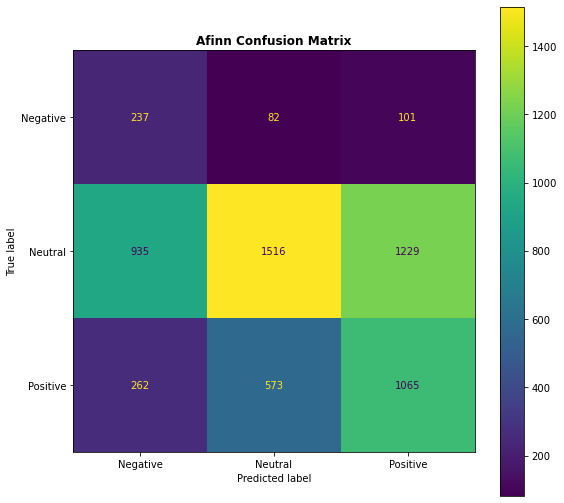

In [100]:
create_confusion_matrix("afinn", afinn_inputs)

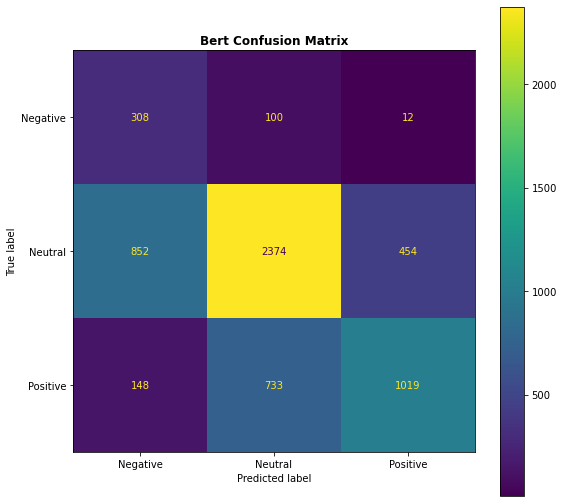

In [101]:
create_confusion_matrix("bert", bert_inputs)

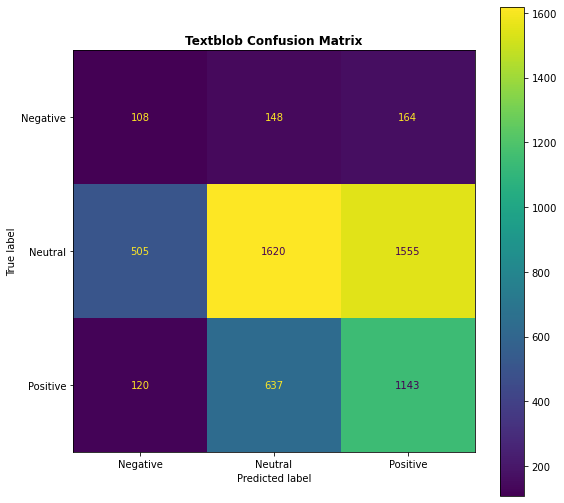

In [102]:
create_confusion_matrix("textblob", textblob_inputs)

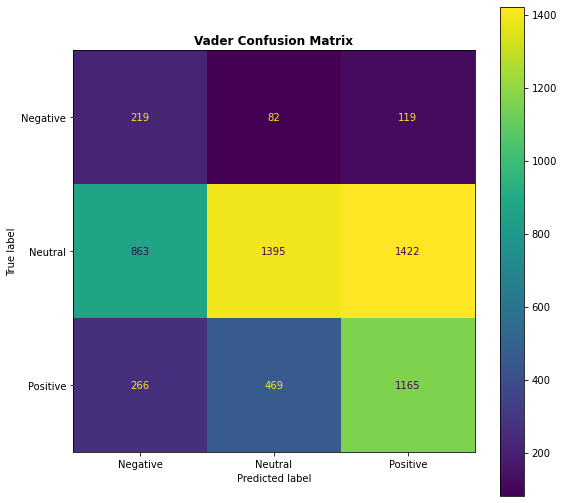

In [103]:
create_confusion_matrix("vader", vader_inputs)

Test how preprocessing affects results

Process taken from https://medium.com/analytics-vidhya/basic-tweet-preprocessing-method-with-python-56b4e53854a1

In [38]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\craig\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [49]:
def preprocessing(post):

    stop_words = set(stopwords.words('english'))        # sets stop words
    text = process_emoji(post)      # removes emojis
    removed_punctuation = [char for char in text if char not in string.punctuation]     # removes punctuation
    removed_punctuation = ''.join(removed_punctuation)

    lowercase = removed_punctuation.lower()     # lowers text

    url_remove = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', lowercase)        # removes url
    url_remove = re.sub(r'http\S+', '', url_remove)
    
    remove_uname = re.sub('@[^\s]+', '', url_remove)        # removes username

    remove_htag = re.sub(r'#([^\s]+)', r'\1', remove_uname)     # removes hashtag

    remove_htag = word_tokenize(remove_htag)

    no_stopwords = []
    
    for w in remove_htag:       # removes stop words
        if w not in stop_words:
            no_stopwords.append(w)

    return ' '.join(no_stopwords)

In [50]:
preprocessing("@piersmorgan WATHC your back lad!")

'piersmorgan wathc back lad'

In [51]:
afinn_inputs = pd.DataFrame(test2["tweet_text"])
bert_inputs = pd.DataFrame(test2["tweet_text"])
textblob_inputs = pd.DataFrame(test2["tweet_text"])
vader_inputs = pd.DataFrame(test2["tweet_text"])

In [52]:
afinn_inputs["preprocessed"] = afinn_inputs["tweet_text"].apply(preprocessing)
textblob_inputs["preprocessed"] = textblob_inputs["tweet_text"].apply(preprocessing)
vader_inputs["preprocessed"] = vader_inputs["tweet_text"].apply(preprocessing)

In [53]:
afinn_inputs["label"] = afinn_inputs["preprocessed"].apply(database_as_afinn)
bert_inputs["label"] = bert_inputs["tweet_text"].apply(database_as_bert)
textblob_inputs["label"] = textblob_inputs["preprocessed"].apply(database_as_textblob)
vader_inputs["label"] = vader_inputs["preprocessed"].apply(database_as_vader)

In [54]:
model_accuracy(afinn_inputs, "Afinn")

The report for Afinn:
              precision    recall  f1-score   support

    negative      0.171     0.538     0.260       420
     neutral      0.702     0.427     0.531      3680
    positive      0.446     0.574     0.502      1900

    accuracy                          0.481      6000
   macro avg      0.440     0.513     0.431      6000
weighted avg      0.584     0.481     0.503      6000



In [55]:
model_accuracy(bert_inputs, "BERT")

The report for BERT:
              precision    recall  f1-score   support

    negative      0.235     0.733     0.356       420
     neutral      0.740     0.645     0.689      3680
    positive      0.686     0.536     0.602      1900

    accuracy                          0.617      6000
   macro avg      0.554     0.638     0.549      6000
weighted avg      0.688     0.617     0.638      6000



In [56]:
model_accuracy(textblob_inputs, "TextBlob")

The report for TextBlob:
              precision    recall  f1-score   support

    negative      0.143     0.245     0.180       420
     neutral      0.678     0.479     0.561      3680
    positive      0.413     0.582     0.483      1900

    accuracy                          0.495      6000
   macro avg      0.411     0.435     0.408      6000
weighted avg      0.557     0.495     0.510      6000



In [57]:
model_accuracy(vader_inputs, "VADER")

The report for VADER:
              precision    recall  f1-score   support

    negative      0.167     0.490     0.249       420
     neutral      0.716     0.386     0.502      3680
    positive      0.431     0.631     0.512      1900

    accuracy                          0.471      6000
   macro avg      0.438     0.502     0.421      6000
weighted avg      0.587     0.471     0.487      6000



Tweet accuracy

In [65]:
post = "i am feeling so sick after the vaccine"

In [68]:
post2 = "i had the coronavirus vaccine today"

In [69]:
afinn_test = database_as_afinn(post2)
bert_test = database_as_bert(post2)
tblob_test = database_as_textblob(post2)
vader_test = database_as_vader(post2)

In [70]:
print("Afinn classified this post as: ", afinn_test)
print("BERT classified this post as: ", bert_test)
print("TextBlob classified this post as: ", tblob_test)
print("VADER classified this post as: ", vader_test)

Afinn classified this post as:  neutral
BERT classified this post as:  neutral
TextBlob classified this post as:  neutral
VADER classified this post as:  neutral
